This notebook investigates a somewhat mysterious data set that we have been handed. The question is if this data set contains information? Can we find correlations between the features in the data records? And if so, can we deduce somehow what the features represent and what the correlation means? Can we find a (linear regression) model that can help us predict future values of a target feature based on known values for predictor features? 

In [32]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

The data set we will investigate can be found on GitHub. We can download it into a Pandas Data Frame in our Python Notebook Kernel.

In [33]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/lucasjellema/theArtOfMachineLearning/master/linearRegression.csv',  sep=';')
data.head()

,A,B,C,D,E,F,G
0,1104534,ZTR,0.1,anijs,2,36,T
1,631148,ESE,132.0,rivier,0,21,S
2,-3,WGN,71.0,appel,0,1,-
3,1262300,ZTR,56.0,zes,2,41,T
4,315529,HVN,1290.0,hamer,0,11,-


In [34]:
# print the shape of the DataFrame
data.shape

(10, 7)

Let's see if visualizing the data in scatter plots gives us some insight. We randomly plot features against each other, hoping that we will see some form of correlation appearing in the visuals (this only works with a small number of features obviously). If we want to learn about dependencies between more than two or three features, we need mathematics instead of pretty pictures.

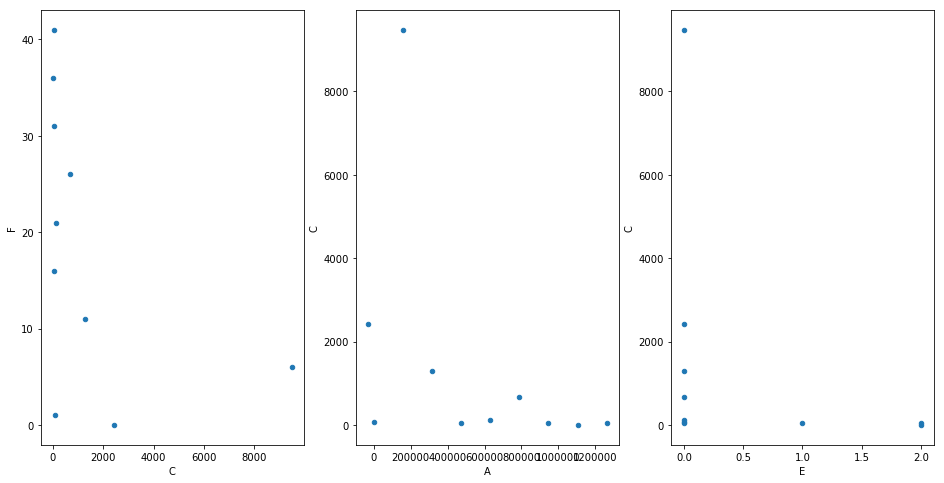

In [35]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=False)
data.plot(kind='scatter', x='C', y='F', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='A', y='C', ax=axs[1])
data.plot(kind='scatter', x='E', y='C', ax=axs[2])

Mmmm, these plots do not really tell much of a story yet. Let's see two more combinations of features:

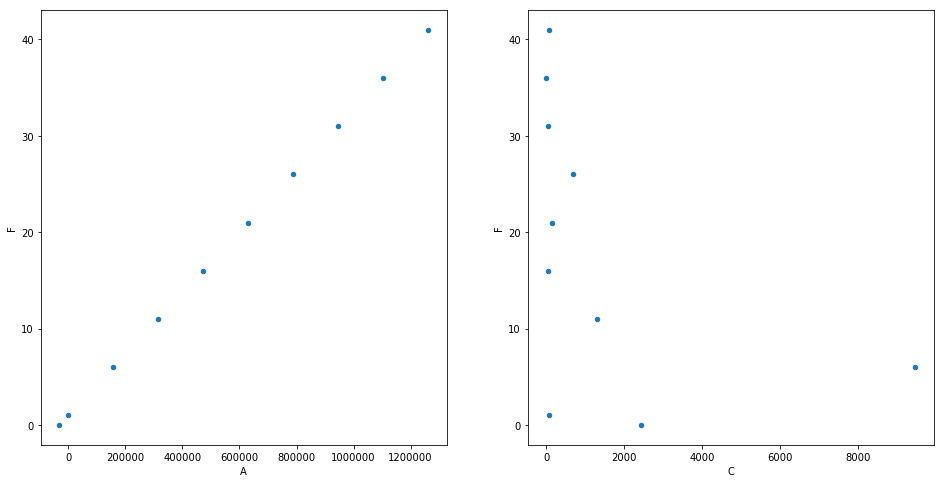

In [36]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=False)
data.plot(kind='scatter', x='A', y='F', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='C', y='F', ax=axs[1])


Ah - now we are talking! There is a clear correlation between feature A and F. Whether A drives F, F drives A or the two describe essentially the same underlying value is not yet clear. However, we have a lead to investigate!


Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?

    $y$ is the response
    $x$ is the feature
    $\beta_0$ is the intercept
    $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict F!


We can now try to determine the simple linear regression model that fits these data points. We do so using the StatsModels library, one of many at our disposal in Python.

In [37]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='F ~ A', data=data).fit()

# print the coefficients
lm.params

Intercept    1.000269
A            0.000032
dtype: float64

The model found looks like:

Feature F = 1 + 0.000032 * Feature A

That does not necessarily tell us a lot. Let's see how closely this model fits the data. 

In [38]:
# print a summary of the fitted model
lm.summary()

/home/python/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      F   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.634e+09
Date:                Wed, 14 Jun 2017   Prob (F-statistic):           2.33e-35
Time:                        13:13:24   Log-Likelihood:                 57.645
No. Observations:                  10   AIC:                            -111.3
Df Residuals:                       8   BIC:                            -110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0003      0.000   2272.870      0.000         0.999     1.001
A           3.169e-05   6.17e-10   5.13e+04      0.000      3.17e-05  3.17e-05
==============================================================================
Omnibus:                        1.459   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.800
Skew:                           0.269   Prob(JB):                        0.670
Kurtosis:                       1.722   Cond. No.                     1.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This means the fit is pretty tight - although the data set is too small to be overly confident.

We can predict the value of F for a given value of feature A (1630050)

In [39]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'A': [1630050]})
X_new.head()

,A
0,1630050


In [40]:
lm.predict(X_new)

array([ 52.6535966])

However, what this means is not yet very clear.

Then we have an insight, one of those Eureka moment in the Data Science Lab:

Column A contains number of kiloseconds since 1970. Of course, we should have know!

We can make this clearer by adding a column to the data set:

In [41]:
data['Years_Since_1970'] = data['A']/(365*24*3600)*1000
data

,A,B,C,D,E,F,G,Years_Since_1970
0,1104534,ZTR,0.1,anijs,2,36,T,35.024543
1,631148,ESE,132.0,rivier,0,21,S,20.013572
2,-3,WGN,71.0,appel,0,1,-,-0.000095
3,1262300,ZTR,56.0,zes,2,41,T,40.027270
4,315529,HVN,1290.0,hamer,0,11,-,10.005359
5,788914,ASM,676.0,zwaluw,0,26,T,25.016299
6,157762,HVN,9482.0,wie,0,6,-,5.002600
7,946681,DHG,42.0,rond,1,31,T,30.019058
8,-31539,WGN,2423.0,bruin,0,0,-,-1.000095
9,473382,HVN,54.0,hamer,0,16,P,15.010845


Now we can create a model for this more meaningful column:

In [42]:
# create a fitted model in one line
lm2 = smf.ols(formula='F ~ Years_Since_1970', data=data).fit()

# print the coefficients
lm2.params

Intercept           1.000269
Years_Since_1970    0.999319
dtype: float64

The formula the model describes for predicting F based on the Years_Since_1970 is:

F = 1 + 1 * Years_Since_1970.

Predicting a new value for say 2017 - or 47 years since 1970:

In [43]:
X_2017 = pd.DataFrame({'Years_Since_1970': [47]})
X_2017.head()
lm2.predict(X_2017)

array([ 47.9682448])

So the predicted value for 2017 turns out to be 48.

And indeed - in 2017 I will turn 48. This model pretty accurately predicts the age I reach in a given year. It fails for years prior to 1969 and probably for years in the far future.